# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as ex
from matplotlib import style
style.use('ggplot')
import seaborn as sns
import numpy as np
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words  = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
import requests
import pickle


# Data Preprocessing


In [2]:
df = pd.read_csv('IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


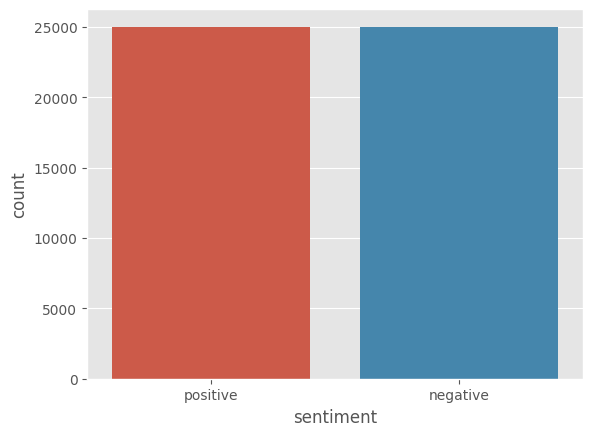

In [3]:
sns.countplot(x='sentiment',data=df)
plt.show()

In [4]:
df = df.sample(25000)

In [5]:
df=df.reset_index()

In [6]:
df['review'][0]

"This movie is so bad that I cannot even begin to describe it. What in the blazing pit is wrong with the writers, producers and director? How on earth did they get funding for this abomination? The plot is laughable, the acting is poor at best, the story... What story? The first fight in this movie is OK but then it keeps repeating itself until you want to turn it off.<br /><br />I guess I'm the biggest looser for not turning this stupid movie off after the first minute.<br /><br />*** SPOLER ALERT ***<br /><br />I only saw this movie because Scott Adkins was in it... and he is in it... for 30 seconds...<br /><br />I give it 1 out of 10 because it's the lowest grade IMDb has to offer.<br /><br />Do yourself a favour: See an Uwe Boll movie instead... twice... it's more worthy of your time."

In [7]:
df=df.reset_index(drop=True)

In [8]:
df['sentiment']=df['sentiment'].map({'negative':0,'positive':1})

In [9]:
def clean_html(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [10]:
df['review'] = df['review'].apply(clean_html)

In [11]:
df['review'][0]

"This movie is so bad that I cannot even begin to describe it. What in the blazing pit is wrong with the writers, producers and director? How on earth did they get funding for this abomination? The plot is laughable, the acting is poor at best, the story... What story? The first fight in this movie is OK but then it keeps repeating itself until you want to turn it off.I guess I'm the biggest looser for not turning this stupid movie off after the first minute.*** SPOLER ALERT ***I only saw this movie because Scott Adkins was in it... and he is in it... for 30 seconds...I give it 1 out of 10 because it's the lowest grade IMDb has to offer.Do yourself a favour: See an Uwe Boll movie instead... twice... it's more worthy of your time."

In [12]:
def to_lower(text):
    return text.lower()

In [13]:
df['review'] = df['review'].apply(to_lower)

In [14]:
df

,index,review,sentiment
0,19603,this movie is so bad that i cannot even begin ...,0
1,3358,i'm just getting the chance to dig into past a...,1
2,27271,"even though this was a well-told story, i foun...",0
3,45071,. . . is just as good as the original. very ne...,1
4,4031,the only good part about this film is the beau...,0
...,...,...,...
24995,18319,"having developed a critical eye for film, and ...",1
24996,17601,here is a rundown of a typical rachael ray sho...,0
24997,30337,"a friend of mine, who is even more into 1970s ...",0
24998,3342,1 let's suspend belief for a moment and let's ...,1


In [15]:
def remove_special(text):
    x=''
    
    for i in text:
        if i.isalnum():
            x=x+i
        else:
            x = x + ' '
    return x

In [16]:
df['review'] = df['review'].apply(remove_special)

In [17]:
df['review']

0        this movie is so bad that i cannot even begin ...
1        i m just getting the chance to dig into past a...
2        even though this was a well told story  i foun...
3              is just as good as the original  very ne...
4        the only good part about this film is the beau...
                               ...                        
24995    having developed a critical eye for film  and ...
24996    here is a rundown of a typical rachael ray sho...
24997    a friend of mine  who is even more into 1970s ...
24998    1 let s suspend belief for a moment and let s ...
24999    if you are looking for an erotic masterpiece t...
Name: review, Length: 25000, dtype: object

In [18]:
def remove_stopwords(text):
    x=[]
    
    for i in text.split():
        if i not in stop_words:
            x.append(i)
    y=x[:]
    x.clear()
    
    return y
            

In [19]:
df['review'] = df['review'].apply(remove_stopwords)

In [20]:
ps = PorterStemmer()
y=[]
def stem_text(text):
    for i in text:
        y.append(ps.stem(i))
    z=y[:]
    y.clear()
    
    return z

In [21]:
df['review'] = df['review'].apply(stem_text)

In [22]:
def join_back(list_input):
    return ' '.join(list_input)

In [23]:
df['review'] = df['review'].apply(join_back)

# Model Training

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(stop_words='english',use_idf=True,lowercase=True, strip_accents='ascii')

In [25]:
X = tf.fit_transform(df['review']).toarray()

In [26]:
df=df.drop(columns=['index'])

In [27]:
x = df.iloc[:,0:1].values
y=df.iloc[:,1:].values

In [28]:
pickle.dump(tf,open('transform.pkl','wb'))

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [30]:
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [31]:
reg = RandomForestClassifier()

In [32]:
reg.fit(X_train,Y_train.ravel())

RandomForestClassifier()

In [33]:
y_pred6 = reg.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score,precision_score,precision_recall_curve,recall_score,f1_score

In [35]:
acc6 = accuracy_score(y_pred6,Y_test)
acc6

0.8469333333333333

In [36]:
models = ['Gaussian Naive Bayes','Multinomial Naive Bayes','Bernoulli Naive Bayes','Decision Tree','Random Forest', 'Logistic Regression']

In [37]:
plt.figure(figsize=(20, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red','magenta','purple','black'],width=0.2)
plt.xticks(fontsize=22, color='black')
plt.xlabel('Models',size=25)
plt.yticks(fontsize=22,color='black')
plt.ylabel('Accuracy',size=25)
plt.title('Comparison of Different Classification Algorithms',size=20)
plt.ylim(0, 1)
plt.show()

NameError: name 'accuracy_scores' is not defined

<Figure size 2000x600 with 0 Axes>

In [ ]:
y_pred2[0]

In [38]:
pickle.dump(reg,open('nlp.pkl','wb'))

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve


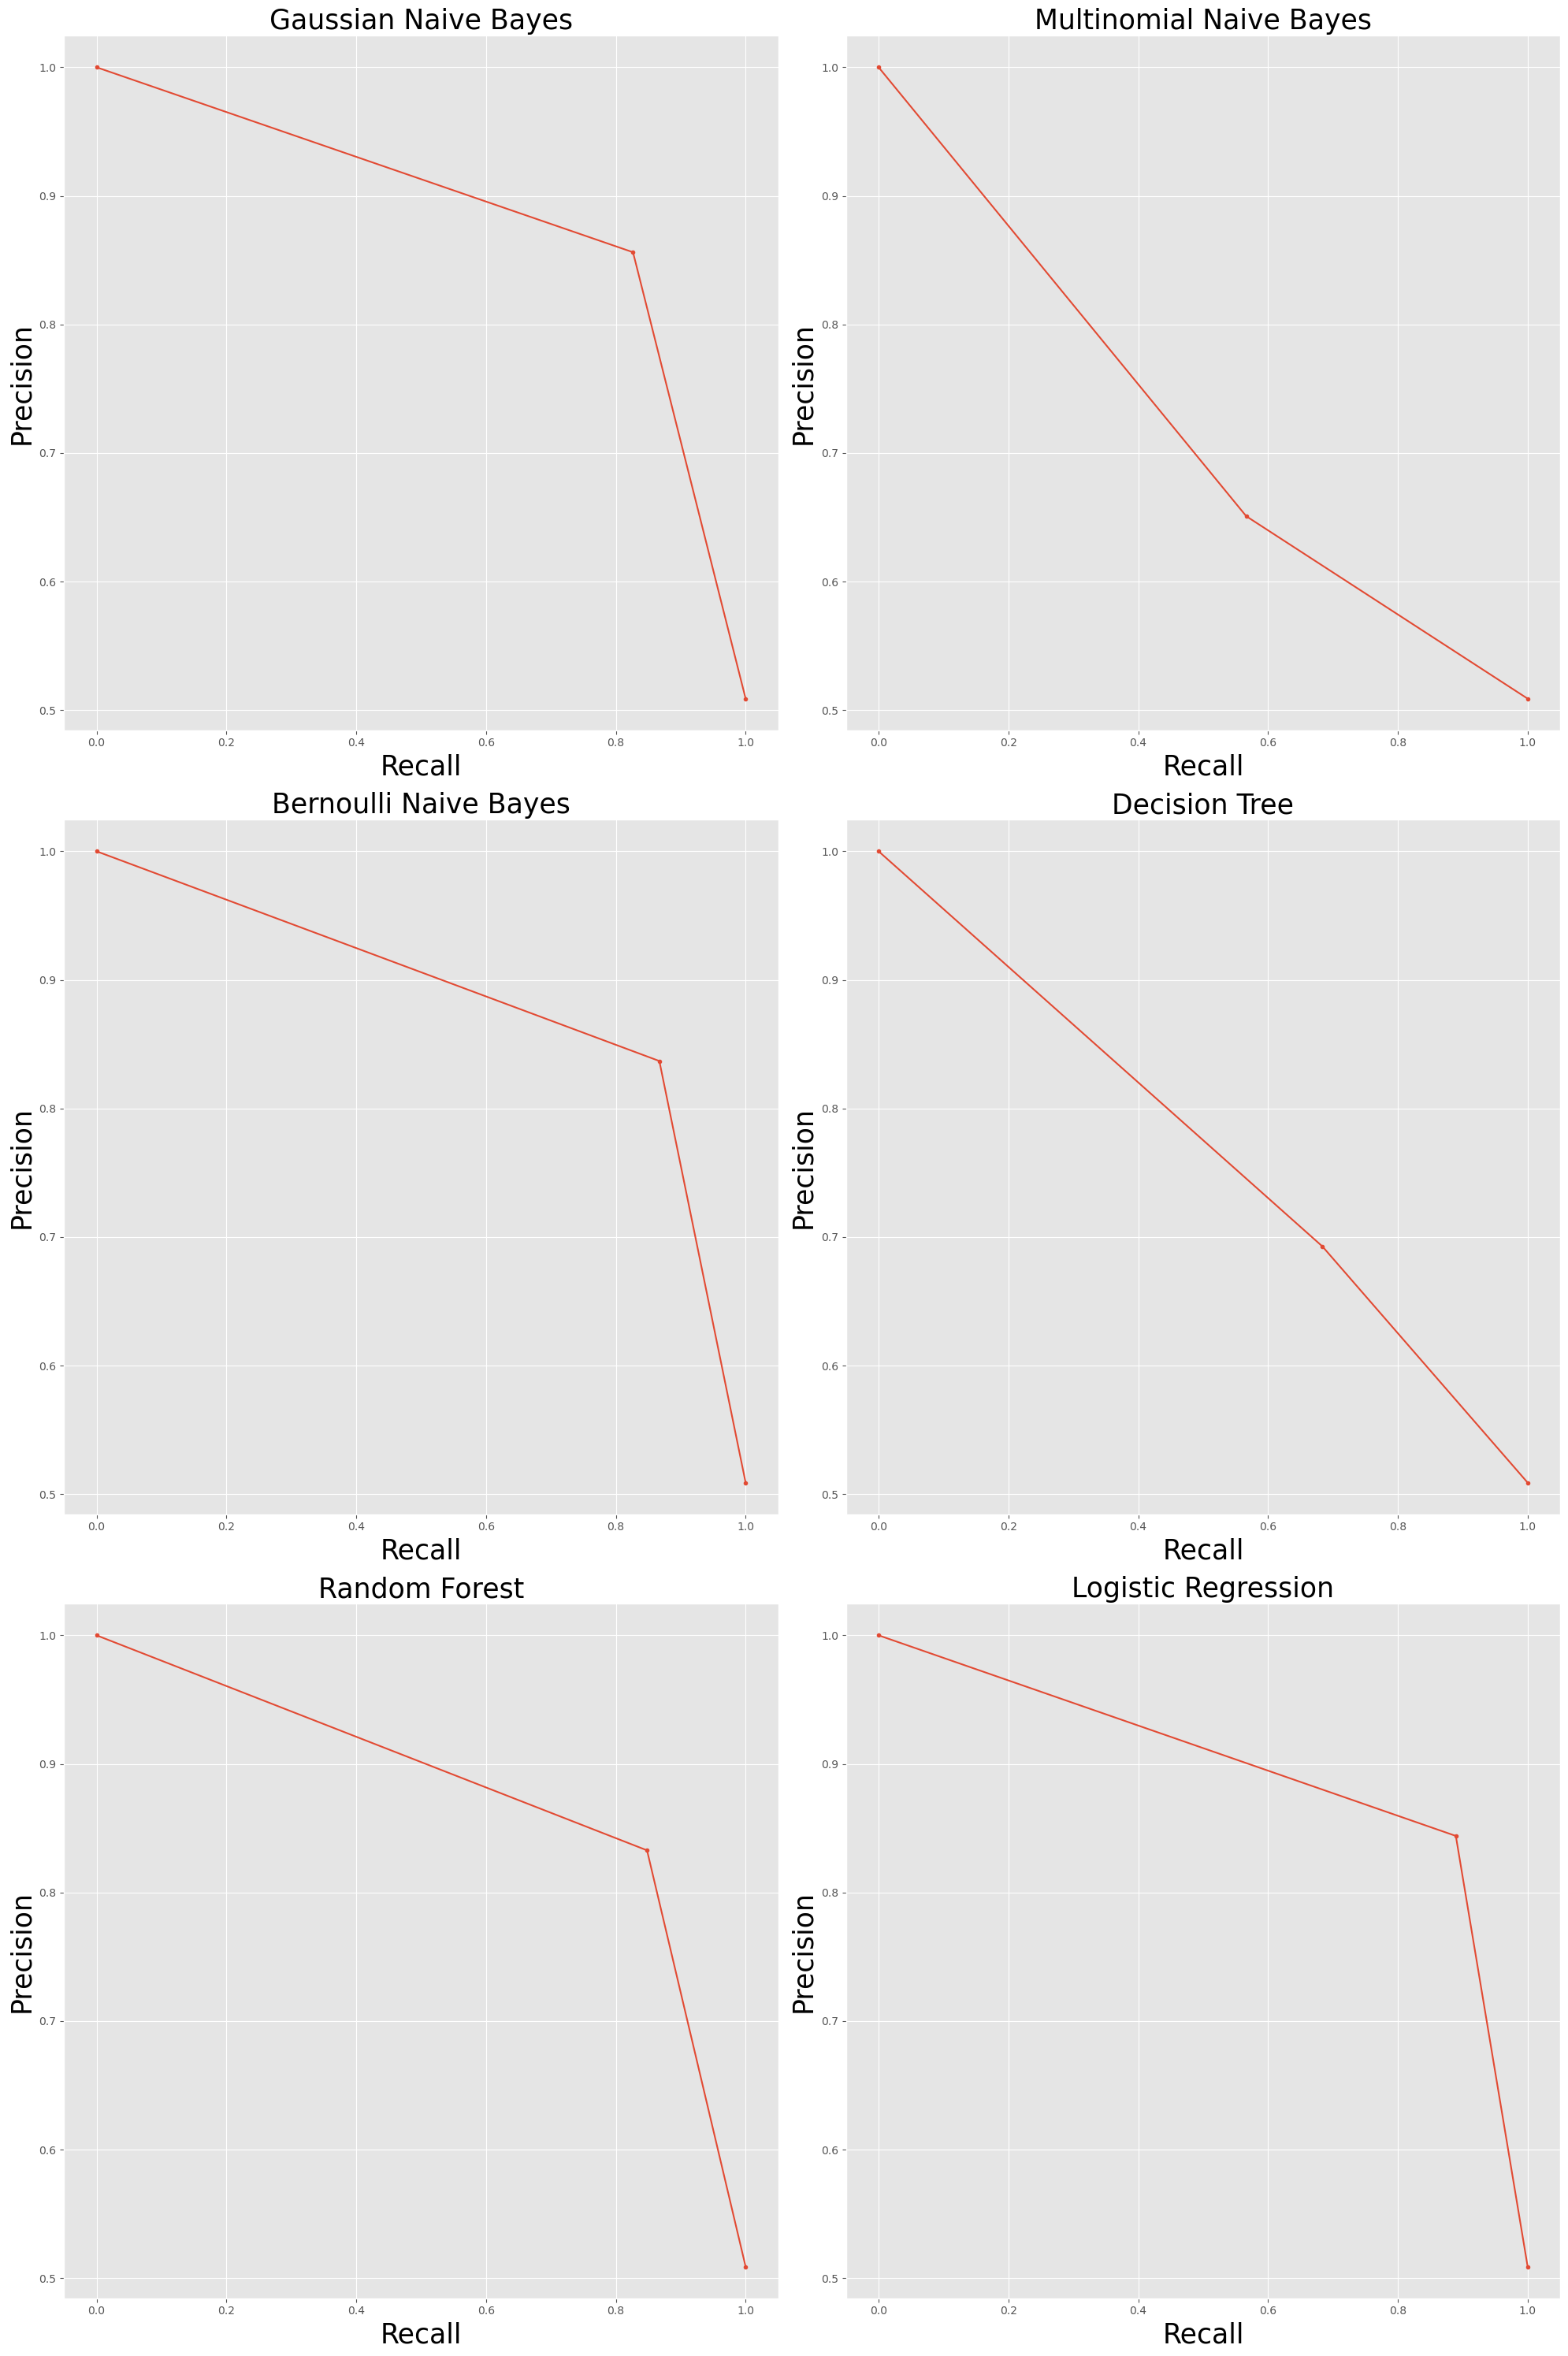

In [69]:
models = ['Gaussian Naive Bayes','Multinomial Naive Bayes','Bernoulli Naive Bayes','Decision Tree','Random Forest', 'Logistic Regression']
fig, axes = plt.subplots(3,2, figsize=(20, 30))
axes = axes.flatten()  
for i in range(len(models)):
    precision, recall, thresholds = precision_recall_curve(Y_test, y_preds[i])
    axes[i].plot(recall, precision, marker='.')
    axes[i].set_title(models[i],size=25)
    axes[i].set_xlabel('Recall',size=25)
    axes[i].set_ylabel('Precision',size=25)

plt.tight_layout()
plt.show()

In [ ]:
models1 = ['Bernoulli Naive Bayes','Decision Tree']
fig, axes = plt.subplots(1,2, figsize=(18, 9))
axes = axes.flatten()  
for i in range(len(models1)):
    precision, recall, thresholds = precision_recall_curve(Y_test, y_preds[i])
    axes[i].plot(recall, precision, marker='.')
    axes[i].set_title(models1[i],size=20)
    axes[i].set_xlabel('Recall',size=20)
    axes[i].set_ylabel('Precision',size=20)

plt.tight_layout()
plt.show()

In [ ]:
models2 = ['Bernoulli Naive Bayes','Decision Tree']
fig, axes = plt.subplots(1,2, figsize=(18, 9))
axes = axes.flatten()  
for i in range(len(models1)):
    precision, recall, thresholds = precision_recall_curve(Y_test, y_preds[i])
    axes[i].plot(recall, precision, marker='.')
    axes[i].set_title(models1[i],size=20)
    axes[i].set_xlabel('Recall',size=20)
    axes[i].set_ylabel('Precision',size=20)

plt.tight_layout()
plt.show()

In [ ]:
models3 = ['Bernoulli Naive Bayes','Decision Tree']
fig, axes = plt.subplots(1,2, figsize=(18, 9))
axes = axes.flatten()  
for i in range(len(models1)):
    precision, recall, thresholds = precision_recall_curve(Y_test, y_preds[i])
    axes[i].plot(recall, precision, marker='.')
    axes[i].set_title(models1[i],size=20)
    axes[i].set_xlabel('Recall',size=20)
    axes[i].set_ylabel('Precision',size=20)

plt.tight_layout()
plt.show()

In [38]:
cm = confusion_matrix(Y_test, y_pred6, labels=reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=reg.classes_,)

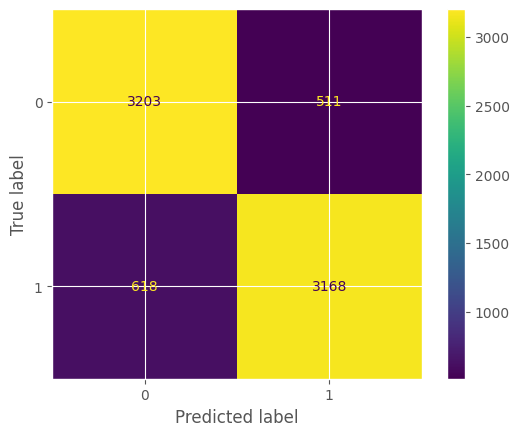

In [39]:
disp.plot()
plt.show()